### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import re

### Loading the Datasets

In [2]:
data=pd.read_csv("./dataset/train.csv")
test_data=pd.read_csv("./dataset/test.csv")
print(data.head(10))

  customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   
5  CST_123268     Sarah Marsh   46      F        Y          N             0.0   
6  CST_127502           Mason   38      M        N          Y             1.0   
7  CST_151722            Saba   46      F        Y          Y             1.0   
8  CST_133768        Ashutosh   40      F      NaN          Y             0.0   
9  CST_111670  David Milliken   39      F        Y          Y             2.0   

   net_yearly_income  no_of_days_employed        occupation_type  \
0          107934.04                612.

In [3]:
print(data.shape)

(45528, 19)


In [4]:
data.describe(include='all')

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528,45528,45528.000000,45528,44981,45528,44754.000000,4.552800e+04,45065.000000,45528,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
unique,45528,4010,NaN,3,2,2,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CST_115179,Jonathan,NaN,F,N,Y,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,207,NaN,29957,29743,31642,NaN,NaN,NaN,14299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,38.993411,NaN,NaN,NaN,0.420655,2.006556e+05,67609.289293,NaN,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,NaN,NaN,9.543990,NaN,NaN,NaN,0.724097,6.690740e+05,139323.524434,NaN,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,NaN,NaN,23.000000,NaN,NaN,NaN,0.000000,2.717061e+04,2.000000,NaN,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,31.000000,NaN,NaN,NaN,0.000000,1.263458e+05,936.000000,NaN,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,39.000000,NaN,NaN,NaN,0.000000,1.717149e+05,2224.000000,NaN,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,47.000000,NaN,NaN,NaN,1.000000,2.406038e+05,5817.000000,NaN,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000


#### Some initial observations.

###### For every 25 percentile increase the age increases by 8.Hence the age seems to be uniformly distributed throughout the dataset.
###### Some names seems to be repeated but the customer_id is not repeated which means that there might be entries of a person with multiple credit cards.
###### 14299 entries contain occupation_type labelled as 'unknown'.

### Checking for dtypes of columns.

In [5]:
dt=pd.DataFrame(columns=["dtype","total"])
dtypes=data.dtypes.value_counts()
dt.dtype=list(dtypes.index)
dt.total=list(dtypes.values)
dt=dt.style.set_properties(**{'background-color':'yellow','color':'black'})
dt.set_table_attributes("style='display:inline'").set_caption("Data types of the columns")
#print(dt)

,dtype,total
0,float64,8
1,object,6
2,int64,5


In [6]:
col_type=pd.DataFrame(columns=["Column_names","data_types"])
col_data=data.dtypes
col_type["Column_names"]=list(col_data.index)
col_type["data_types"]=list(col_data.values)
col_type.sort_values(by='data_types',ascending='True',inplace=True)
col_type.reset_index(inplace=True,drop=True)
col_type


,Column_names,data_types
0,credit_card_default,int64
1,prev_defaults,int64
2,age,int64
3,credit_limit_used(%),int64
4,default_in_last_6months,int64
5,credit_score,float64
6,credit_limit,float64
7,no_of_children,float64
8,net_yearly_income,float64
9,no_of_days_employed,float64


In [7]:

categorical_columns=list(col_type.Column_names[(col_type.data_types=='object')].values)
numerical_columns=list(col_type.Column_names[(col_type.data_types=='float64') | (col_type.data_types=='int64')].values)

In [8]:
data.name.value_counts().sort_values(ascending=False)[:10]

Jonathan            207
Jonathan Stempel    192
David               170
Stempel             165
Jessica             162
Sarah               147
Lucia               142
Nick                140
Lucia Mutikani      137
Jones               133
Name: name, dtype: int64

In [9]:
data[data.name=="Jonathan Stempel"][:10]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
254,CST_113854,Jonathan Stempel,41,F,N,Y,0.0,121548.28,365240.0,Unknown,1.0,0.0,7385.18,35876.02,82,848.0,0,0,0
741,CST_109433,Jonathan Stempel,31,F,Y,Y,0.0,486061.51,5459.0,Managers,2.0,0.0,48519.66,118311.52,15,896.0,0,0,0
833,CST_114457,Jonathan Stempel,44,F,N,Y,0.0,140730.45,365246.0,Unknown,2.0,0.0,24214.94,16437.61,44,709.0,0,0,0
1048,CST_100560,Jonathan Stempel,30,F,N,N,0.0,52400.34,365249.0,Unknown,2.0,0.0,12266.65,7660.66,78,668.0,0,0,0
1223,CST_105262,Jonathan Stempel,37,F,Y,Y,0.0,268306.08,1114.0,Unknown,2.0,0.0,10086.52,94377.10,95,901.0,0,0,0
1322,CST_115792,Jonathan Stempel,54,F,N,Y,0.0,334404.45,7070.0,Managers,1.0,0.0,41187.90,60366.88,92,806.0,0,0,0
1492,CST_105671,Jonathan Stempel,39,M,N,N,1.0,286833.32,2455.0,Unknown,3.0,1.0,50236.16,69358.03,37,881.0,0,0,0
1776,CST_113496,Jonathan Stempel,38,M,Y,Y,0.0,292351.99,1793.0,Managers,1.0,0.0,25432.46,38372.74,75,782.0,0,0,0
1791,CST_104008,Jonathan Stempel,44,F,N,Y,0.0,138463.53,99.0,Laborers,1.0,1.0,11511.52,48535.94,69,668.0,0,0,0
1926,CST_111049,Jonathan Stempel,42,F,N,Y,1.0,155590.54,704.0,Private service staff,3.0,0.0,21134.33,31302.79,99,740.0,0,0,0


###### Our assumption regarding multiple entries of a person with different uid holdilng different credit cards seems to be wrong since it seems that different people with same name exists and the uid is given to each person and not to each credit card of different companies owned by a person.Since,the name column doesn't seem to provide valuable information,it needs to be dropped so that the computational costs would be reduced.

In [10]:
data.drop(["name"],axis=1,inplace=True)
test_data.drop(["name"],axis=1,inplace=True)

### Checking for correlation between variables.

In [11]:
#numeric_data=mod_data.select_dtypes(exclude=['object'])
numeric_data=data[numerical_columns]
print(numeric_data.shape)

(45528, 13)


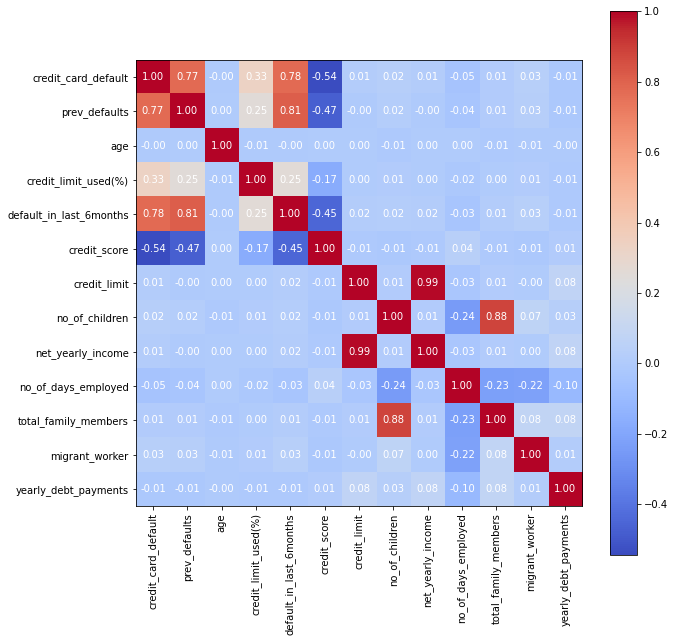

In [12]:
def correlation_plot(numeric_data):
    plt.imshow(numeric_data.corr(),cmap='coolwarm',interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(numeric_data.columns)),numeric_data.columns,rotation=90)
    plt.yticks(range(len(numeric_data.columns)),numeric_data.columns)
    plt.gcf().set_size_inches(10,10)

    labels=numeric_data.corr().values
    #print(labels.shape)
    for y in range(labels.shape[0]):
        for x in range(labels.shape[1]):
            plt.text(x,y,'{:.2f}'.format(labels[y,x]),ha='center',va='center',color='white')


correlation_plot(numeric_data)

From the above figure we can see that "no_of_children" and "total_family_members" are highly correlated.
Hence,dropping one of them
also,"prev_default" and "default_in_last_6months" seems to be highly correlated.
"credit_limit" and "net_yearly_income" also seems to be highly correlated.

The important features with respect to the target variable are default_in_last_6_months,prev_Defaults,credit_score and credit_limit_used(%)

## Feature exploration and visualization.

In [13]:
mod_data=data.copy()
mod_data.dropna(inplace=True)
max_val=mod_data.net_yearly_income.max()
indx=mod_data[mod_data.net_yearly_income==max_val].index
#indx=mod_data.net_yearly_income[max_val].index
print(indx.values[0])
mod_data.drop(labels=[indx.values[0]],axis=0,inplace=True)

26662


In [14]:
idxs=mod_data.index
data1=data.yearly_debt_payments[idxs]
data2=data.total_family_members[idxs]
data3=data.no_of_children[idxs]

Text(0.5, 1.0, ' Occupation type vs Net yearly income')

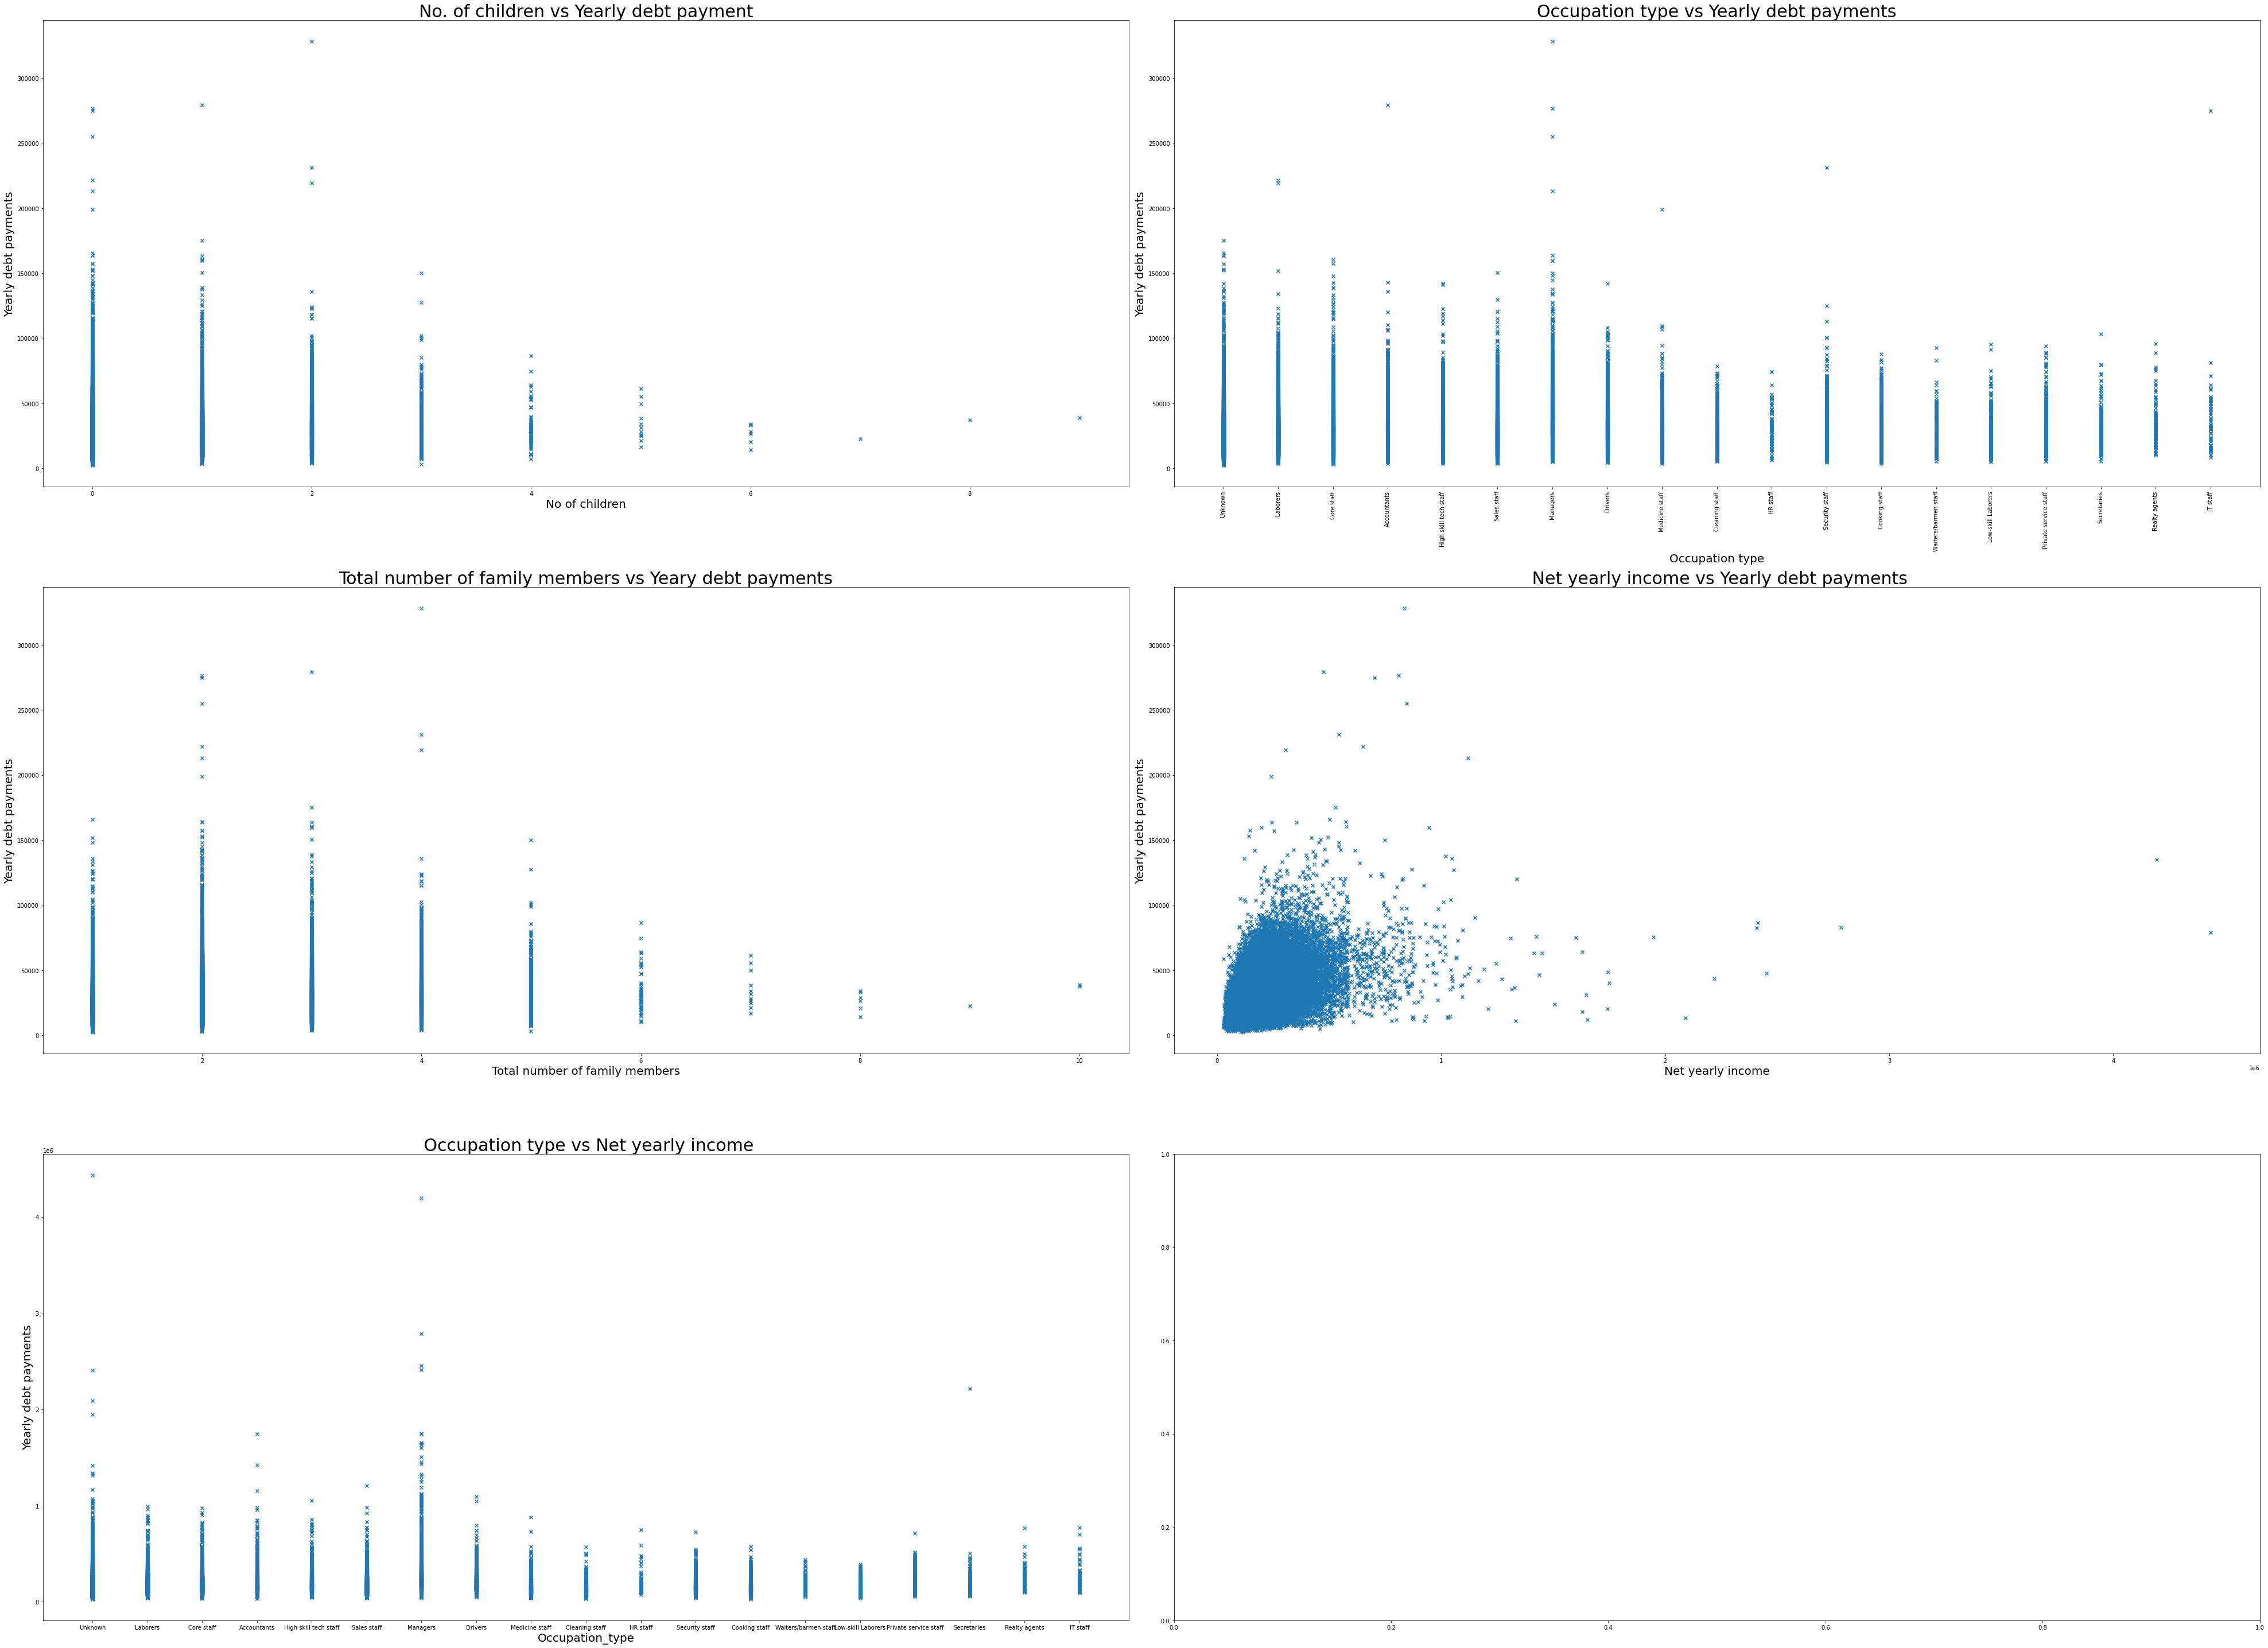

In [15]:
ROWS=3
COLS=2
fig,ax=plt.subplots(nrows=ROWS,ncols=COLS,figsize=(55,40),tight_layout=True)
ax[0][0].scatter(data3,data1,marker='x')
ax[0][0].set_xlabel("No of children",fontsize=20)
ax[0][0].set_ylabel("Yearly debt payments",fontsize=20)
ax[0][0].set_title("No. of children vs Yearly debt payment",fontsize=30)
ax[0][1].scatter(mod_data.occupation_type[idxs],data1,marker='x')
ax[0][1].tick_params(axis='x', labelrotation = 90)
ax[0][1].set_xlabel("Occupation type",fontsize=20)
ax[0][1].set_ylabel("Yearly debt payments",fontsize=20)
ax[0][1].set_title("Occupation type vs Yearly debt payments",fontsize=30)
#ax[0][1].x(rotation=90)
#ax[0][1].set_xticklabels(ax[0][1].get_xticks(),rotation=90)
ax[1][0].scatter(data2,data1,marker='x')
ax[1][0].set_xlabel("Total number of family members",fontsize=20)
ax[1][0].set_ylabel("Yearly debt payments",fontsize=20)
ax[1][0].set_title("Total number of family members vs Yeary debt payments",fontsize=30)
ax[1][1].scatter(mod_data.net_yearly_income[idxs],data1,marker='x')
ax[1][1].set_xlabel("Net yearly income",fontsize=20)
ax[1][1].set_ylabel("Yearly debt payments",fontsize=20)
ax[1][1].set_title(" Net yearly income vs Yearly debt payments",fontsize=30)
ax[2][0].scatter(mod_data.occupation_type[idxs],mod_data.net_yearly_income[idxs],marker='x')
ax[2][0].set_xlabel("Occupation_type",fontsize=20)
ax[2][0].set_ylabel("Yearly debt payments",fontsize=20)
ax[2][0].set_title(" Occupation type vs Net yearly income",fontsize=30)

### Checking for missing values.

In [16]:
#print(sorted(data.isnull().sum(),reverse=True))
data.isnull().sum().sort_values(ascending=False)

no_of_children             774
owns_car                   547
no_of_days_employed        463
yearly_debt_payments        95
migrant_worker              87
total_family_members        83
credit_score                 8
default_in_last_6months      0
prev_defaults                0
credit_limit_used(%)         0
credit_limit                 0
customer_id                  0
age                          0
occupation_type              0
net_yearly_income            0
owns_house                   0
gender                       0
credit_card_default          0
dtype: int64

### EDA of features + dealing with missing values.

##### a.)age column.

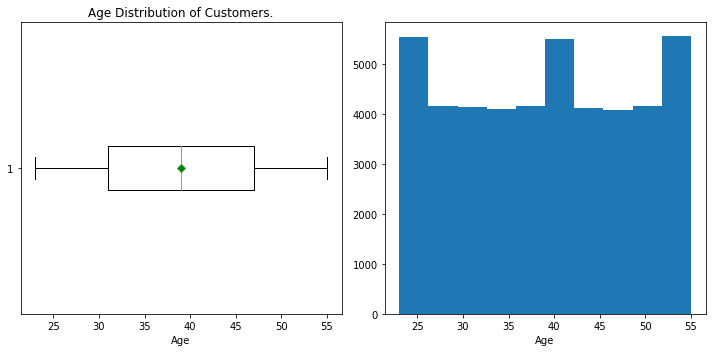

In [17]:
def age_eda():
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,5),tight_layout=True,squeeze=True,sharex='col')
    red_circle=dict(markerfacecolor='red',marker='o')
    mean=dict(markerfacecolor='green',marker='D')
    ax1.boxplot(x=data["age"],vert=False, flierprops=red_circle,showmeans=True,meanprops=mean)
    ax1.set_title("Age Distribution of Customers.")
    ax1.set_xlabel("Age")
    ax2.hist(data.age)
    ax2.set_xlabel("Age")

age_eda()

##### The Age attribute almost follows a uniform distribution.

##### b.) no_of_days_employed column



In [18]:
x=data["no_of_days_employed"]
print(x.min(),x.max(),x.mode())
x.value_counts().sort_values(ascending=False).head(15)

2.0 365252.0 0    365246.0
dtype: float64


365246.0    684
365244.0    669
365240.0    641
365245.0    631
365241.0    628
365247.0    625
365250.0    609
365251.0    607
365243.0    607
365252.0    602
365249.0    601
365242.0    600
365248.0    594
183.0        29
436.0        26
Name: no_of_days_employed, dtype: int64

In [19]:
ddata=data[data.no_of_days_employed > 300000]
#ddata.no_of_days_employed.value_counts()
print(ddata.shape)
y=ddata.no_of_days_employed.unique()
print(y)


(8098, 18)
[365247. 365251. 365241. 365240. 365249. 365244. 365242. 365246. 365245.
 365243. 365248. 365250. 365252.]


##### Converting some values in no. of days employed to days

In [20]:
def hrs_to_dys(column):
    if column>300000:
        column=column/(365*24)
        column=column*365
        column=round(column,2)
    return column

data['no_of_days_employed']=data.no_of_days_employed.apply(lambda x:(hrs_to_dys(x)),1)
test_data['no_of_days_employed']=test_data.no_of_days_employed.apply(lambda x:(hrs_to_dys(x)),1)

#data['no_of_days_employed']=data.no_of_days_employed.apply()

In [21]:
def days_employed_processing(data,value):
    data.no_of_days_employed.replace(np.nan,value,inplace=True)
    #return data
value1=data['no_of_days_employed'].median()
days_employed_processing(data,value1)
days_employed_processing(test_data,value1)

#### Discretizing the no._of_days_employed feature

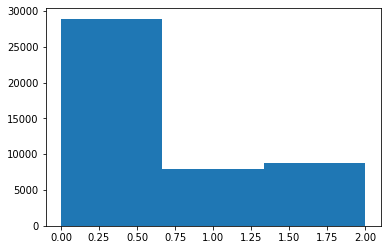

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

kbins=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans',dtype=np.float64)
datatrans=kbins.fit_transform(pd.DataFrame(data.no_of_days_employed))
def no_of_days_employed():
    red_circle=dict(markerfacecolor='red',marker='o')
    mean=dict(markerfacecolor='green',marker='D')
    #fig=plt.figure(figsize=(13,7))
    #plt.boxplot(x=mod_data.no_of_days_employed,vert=False, flierprops=red_circle,showmeans=True,meanprops=mean)
    #plt.title("no_of_days_employed Distribution of Customers.")
    #plt.xlabel("days_employed")
    plt.hist(datatrans,bins=3)
no_of_days_employed()
#plt.scatter(mod_data.index,mod_data.no_of_days_employed,marker='x')
#plt.show()

Here,we can see that most of the customers do not have greater than 10 or 15 years of work experience which justifies the higher number of customers having 25 and 35 years of age.

##### c. yearly_debt_payments column.

In [23]:
debt=data.yearly_debt_payments
print(debt.median(),debt.mean(),debt.min(),debt.max())

29081.65 31796.96531111747 2237.47 328112.86


In [24]:
debt.describe()['75%']

40561.15

##### c.) yearly_debt_payments column

In [25]:
def debt_payments_processing(data,value):
    data.yearly_debt_payments.replace(np.nan,value,inplace=True)
    #return data
value1=data['yearly_debt_payments'].mean()
debt_payments_processing(data,value1)
debt_payments_processing(test_data,value1)

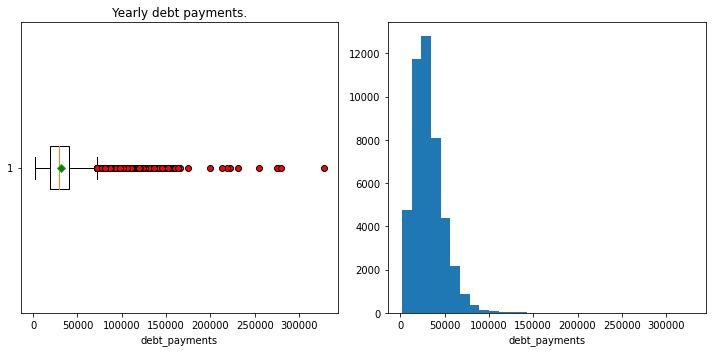

In [26]:
def box_plot_debt_payments():
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,5),tight_layout=True,squeeze=True,sharex='col')
    red_circle=dict(markerfacecolor='red',marker='o')
    mean=dict(markerfacecolor='green',marker='D')
    ax1.boxplot(x=data["yearly_debt_payments"],vert=False, flierprops=red_circle,showmeans=True,meanprops=mean)
    ax1.set_title("Yearly debt payments.")
    ax1.set_xlabel("debt_payments")
    ax2.hist(data.yearly_debt_payments,bins=30)
    ax2.set_xlabel("debt_payments")
box_plot_debt_payments()

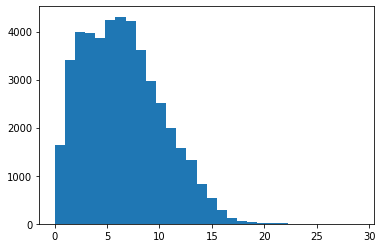

In [27]:
kbin=KBinsDiscretizer(n_bins=30,encode='ordinal',strategy='kmeans',dtype=np.float64)
datat=kbin.fit_transform(pd.DataFrame(data['yearly_debt_payments']))
plt.hist(datat,bins=30)
plt.show()

##### d.) credit_limit_used column.

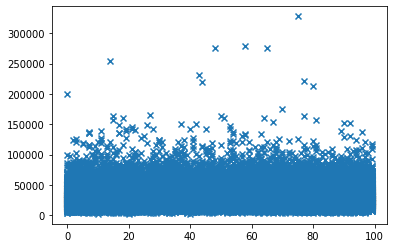

In [28]:
plt.scatter(data['credit_limit_used(%)'],debt,marker='x')

##### e.) total_family_members column.

In [29]:
tt=data.groupby('total_family_members',dropna=False)
tt.count()

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
total_family_members,,,,,,,,,,,,,,,,,
1.0,9913,9913,9913,9802,9913,9721,9913,9913,9913,9891,9913,9913,9913,9910,9913,9913,9913
2.0,23455,23455,23455,23160,23455,23058,23455,23455,23455,23406,23455,23455,23455,23451,23455,23455,23455
3.0,7812,7812,7812,7709,7812,7698,7812,7812,7812,7799,7812,7812,7812,7812,7812,7812,7812
4.0,3623,3623,3623,3591,3623,3564,3623,3623,3623,3620,3623,3623,3623,3622,3623,3623,3623
5.0,564,564,564,560,564,555,564,564,564,564,564,564,564,564,564,564,564
6.0,57,57,57,57,57,55,57,57,57,57,57,57,57,57,57,57,57
7.0,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
8.0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
9.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [30]:
def func(row,val):
    if pd.isnull(row.total_family_members):
        row.total_family_members=val
    return row
u_values=sorted(list(data.total_family_members.unique()))[:5]
data=data.apply(lambda x:func(x,random.choice(u_values)),axis=1)
test_data=test_data.apply(lambda x:func(x,random.choice(u_values)),axis=1)

##### f.) migrant_worker column.

In [31]:
def migrant_w_processing(data,value):
    data.migrant_worker.replace(np.nan,value,inplace=True)
    #return data
value=data.migrant_worker.unique()[0]
migrant_w_processing(data,value)
migrant_w_processing(test_data,value)
#data.migrant_worker=migrant_w_processing(data['migrant_worker'],value)

##### g.) credit score column.

In [32]:
neg_scr=data.credit_score[data.credit_card_default==1].mean()
pos_scr=data.credit_score[data.credit_card_default==0].mean()
pos_scr=round(pos_scr,2)
neg_scr=round(neg_scr,2)

#print(pos_scr,neg_scr)
b1=data.credit_card_default==1
b2=data.credit_card_default==0

#data[data.credit_card_default==1].isnull()
#fillna(pos_scr,inplace=True)
#data[data.credit_card_default==0].fillna(neg_scr,inplace=True)
#data[data.credit_score.isnull().values & b1.values].assign(credit_score=pos_scr)
#data[data.credit_score.isnull().values & b2.values].assign(credit_score=neg_scr)

def fill_na(row,test=False):
    if (test!=True):
        if pd.isnull(row.credit_score) and row.credit_card_default==1:
            row.credit_score=neg_scr
        if pd.isnull(row.credit_score) and row.credit_card_default==0:
            row.credit_score=pos_scr
    elif pd.isnull(row.credit_score) and test==True:
        row.credit_score=(pos_scr+neg_scr)/2
    return row

data=data.apply(lambda x:fill_na(x),axis=1)
test_data=test_data.apply(lambda x:fill_na(x,test=True),axis=1)


In [33]:
data.prev_defaults.value_counts()

0    43060
1     2172
2      296
Name: prev_defaults, dtype: int64

In [34]:
data.default_in_last_6months.value_counts()

0    43227
1     2301
Name: default_in_last_6months, dtype: int64

--prev_default contains more information than default_in_last_6months since it describes the no. of times a customer became a defaulter rather than just describing weather the customer was a defaulter or not.

##### Dropping columns which are not important with respect to the variable to be predicted.

In [35]:
data.drop('owns_car',axis=1,inplace=True)
data.drop(['no_of_children'],axis=1,inplace=True)
data.drop(['default_in_last_6months'],axis=1,inplace=True)
test_data.drop('owns_car',axis=1,inplace=True)
test_data.drop(['no_of_children'],axis=1,inplace=True)
test_data.drop(['default_in_last_6months'],axis=1,inplace=True)

#### creating customer_id as the index.

In [36]:
#mod_data=data.copy()
data['customer_id']=data['customer_id'].apply(lambda x:int(re.findall("\d.*[0-9]",str(x))[0]))
data.set_index('customer_id',inplace=True)
#commend below line for competition purpose.
test_data['customer_id']=test_data['customer_id'].apply(lambda x:int(re.findall("\d.*[0-9]",str(x))[0]))
test_data.set_index('customer_id',inplace=True)

## Feature Scaling for numeric values.

In [37]:
from sklearn.preprocessing import RobustScaler,MaxAbsScaler,QuantileTransformer

data3=data[['net_yearly_income','no_of_days_employed']]
scaler=RobustScaler()
data3=pd.DataFrame(scaler.fit_transform(data3),columns=data3.columns)
data3.set_index(data.index,inplace=True)

In [38]:
class Fscaling():
    def __init__(self):
        pass 

    #Scales data based on percentiles.
    def Robust_Scaler(self,data):
        typ=str(type(data)).split(".")[-1][:-2]
        if typ=="Series":
            data=pd.DataFrame(data)
        scaler=RobustScaler()
        mod_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
        mod_data.index=data.index
        return mod_data

    def Max_Abs_Scaler(self,data):
        typ=str(type(data)).split(".")[-1][:-2]
        if typ=="Series":
            data=pd.DataFrame(data)
        scaler=MaxAbsScaler()
        mod_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
        mod_data.index=data.index
        return mod_data

    #transforms the features to follow a uniform or normal distribution.
    #this transformation tends to spread out the most frequent values.
    #the cumulative distribution function(c.d.f) is used to project original values.
    #this transformation is non-linear
    def quantile_transformer(self,data):
        typ=str(type(data)).split(".")[-1][:-2]
        if typ=="Series":
            data=pd.DataFrame(data)
        scaler=QuantileTransformer()
        mod_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
        mod_data.index=data.index
        return mod_data

In [39]:
print(data.shape)
print(test_data.shape)

(45528, 14)
(11383, 13)


In [40]:
f_obj=Fscaling()
ret_data=f_obj.Robust_Scaler(data['net_yearly_income'])
data.drop(['net_yearly_income'],axis=1,inplace=True)
data=pd.concat([data,ret_data],axis=1)
ret_data=f_obj.Max_Abs_Scaler(data['no_of_days_employed'])
data.drop(['no_of_days_employed'],axis=1,inplace=True)
data=pd.concat([data,ret_data],axis=1)
ret_data=f_obj.quantile_transformer(data['yearly_debt_payments'])
data.drop(['yearly_debt_payments'],axis=1,inplace=True)
data=pd.concat([data,ret_data],axis=1)


In [41]:
ret_data=f_obj.Robust_Scaler(test_data['net_yearly_income'])
test_data.drop(['net_yearly_income'],axis=1,inplace=True)
test_data=pd.concat([test_data,ret_data],axis=1)
ret_data=f_obj.Max_Abs_Scaler(test_data['no_of_days_employed'])
test_data.drop(['no_of_days_employed'],axis=1,inplace=True)
test_data=pd.concat([test_data,ret_data],axis=1)
ret_data=f_obj.quantile_transformer(test_data['yearly_debt_payments'])
test_data.drop(['yearly_debt_payments'],axis=1,inplace=True)
test_data=pd.concat([test_data,ret_data],axis=1)

### Dropping unknown(XNA) category in Gender

In [42]:
id=data[data.gender=="XNA"].index
data.drop(id,axis=0,inplace=True)
idt=test_data[test_data.gender=="XNA"].index
test_data.drop(idt,axis=0,inplace=True)

In [43]:
X=data.drop(["credit_card_default"],axis=1,inplace=False)
y=data["credit_card_default"]
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=42,shuffle=True,stratify=y)
print(ytrain.value_counts())
print(yval.value_counts())

0    33463
1     2958
Name: credit_card_default, dtype: int64
0    8367
1     739
Name: credit_card_default, dtype: int64


In [44]:
print(data.columns,len(data.columns))

Index(['age', 'gender', 'owns_house', 'occupation_type',
       'total_family_members', 'migrant_worker', 'credit_limit',
       'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'credit_card_default', 'net_yearly_income', 'no_of_days_employed',
       'yearly_debt_payments'],
      dtype='object') 14


In [45]:
print(len(xtrain.columns),len(xval.columns),len(test_data.columns))

13 13 13


### Encoding Categorical Variables.

In [46]:
categorical_columns

['customer_id', 'owns_car', 'gender', 'name', 'owns_house', 'occupation_type']

In [47]:
#Encoding categorical variables.
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

class Encoding:
    def __init__(self):
        self.ohenc=OneHotEncoder(handle_unknown='ignore',sparse=False)
        self.olenc=OrdinalEncoder()
        #self.data=data
        #print(type(self.data))
        #print(self.data.head(10))

    def ordinalencode(self,var_list,train=None,val=None,data=None):
        #self.intrdata=self.data.copy()
        if train is None and val is None:
            data[var_list]=self.olenc.transform(data[var_list])
            return data
        else:
            train[var_list]=self.olenc.fit_transform(train[var_list])
            val[var_list]=self.olenc.transform(val[var_list])
            return train,val

    def onehotencode(self,categorical_var_list,train=None,val=None,data=None):
        print(train,val)
        if train is None and val is None:
            self.test_data=data
            self.test_data=pd.DataFrame(self.ohenc.transform(self.test_data[categorical_var_list]))
            self.test_data.index=data.index
            self.num_test_data=data.drop(columns=categorical_var_list,axis=1)
            self.final_test_data=pd.concat([self.num_test_data,self.test_data],axis=1)
            return self.final_test_data
        else:
            self.oh_cols_train=pd.DataFrame(self.ohenc.fit_transform(train[categorical_var_list]))
            self.oh_cols_val=pd.DataFrame(self.ohenc.transform(val[categorical_var_list]))

            self.oh_cols_train.index=train.index
            self.oh_cols_val.index=val.index

            self.num_ohcols_train=train.drop(columns=categorical_var_list,axis=1)
            self.num_ohcols_val=val.drop(columns=categorical_var_list,axis=1)

            self.final_data_train=pd.concat([self.num_ohcols_train,self.oh_cols_train],axis=1)
            self.final_data_val=pd.concat([self.num_ohcols_val,self.oh_cols_val],axis=1)

            return self.final_data_train,self.final_data_val
        

In [48]:
en=Encoding()
xtrain,xval=en.ordinalencode(["owns_house"],train=xtrain,val=xval)
test_data=en.ordinalencode(["owns_house"],data=test_data)

In [49]:
xtrain,xval=en.onehotencode(["gender","occupation_type"],train=xtrain,val=xval)
test_data=en.onehotencode(["gender","occupation_type"],data=test_data)

             age gender  owns_house        occupation_type  \
customer_id                                                  
164920        38      F         1.0             Core staff   
153597        38      F         1.0               Laborers   
106429        46      M         1.0                Drivers   
110261        42      F         1.0                Unknown   
150536        39      F         1.0               Laborers   
...          ...    ...         ...                    ...   
107930        29      F         0.0                Unknown   
125336        48      F         1.0  High skill tech staff   
109884        33      M         1.0                Unknown   
118738        38      F         1.0          Cooking staff   
112155        55      F         1.0             Core staff   

             total_family_members  migrant_worker  credit_limit  \
customer_id                                                       
164920                        2.0             0.0      2233

In [50]:
xtrain.head()

,age,owns_house,total_family_members,migrant_worker,credit_limit,credit_limit_used(%),credit_score,prev_defaults,net_yearly_income,no_of_days_employed,...,11,12,13,14,15,16,17,18,19,20
customer_id,,,,,,,,,,,,,,,,,,,,,
164920,38,1.0,2.0,0.0,22335.12,12,681.0,0,-0.670040,0.082450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153597,38,1.0,2.0,1.0,26166.07,87,820.0,0,-0.409035,0.099441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106429,46,1.0,2.0,0.0,40183.42,41,949.0,0,-0.261465,0.048637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110261,42,1.0,1.0,0.0,43625.75,2,904.0,0,-0.412854,0.867749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150536,39,1.0,1.0,0.0,24872.90,25,722.0,0,-0.857526,0.005873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
print(len(xtrain.columns),len(xval.columns),len(test_data.columns))
test_data.head(10)

32 32 32


,age,owns_house,total_family_members,migrant_worker,credit_limit,credit_limit_used(%),credit_score,prev_defaults,net_yearly_income,no_of_days_employed,...,11,12,13,14,15,16,17,18,19,20
customer_id,,,,,,,,,,,,,,,,,,,,,
142525,52,0.0,2.0,0.0,26524.40,4,779.0,0,0.529951,0.061152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
129215,48,0.0,3.0,0.0,68998.72,70,806.0,0,0.988840,0.081985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138443,50,0.0,3.0,0.0,25187.80,71,528.0,2,-0.207918,0.074142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
123812,30,0.0,2.0,1.0,29179.39,9,815.0,0,-0.110226,0.030821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144450,52,1.0,2.0,1.0,82331.82,82,613.0,1,0.537397,0.009620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107341,29,1.0,2.0,0.0,20346.31,71,720.0,0,-0.244480,0.293750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
147879,37,1.0,1.0,0.0,31383.40,29,944.0,0,-0.255719,0.065502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156027,29,1.0,1.0,0.0,25486.65,5,939.0,0,-0.409900,0.019547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
109067,41,1.0,2.0,0.0,13458.33,12,763.0,0,-0.814242,0.184559,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
xtrain.to_csv("/Amexpert/dataset/train_processed.csv")
xval.to_csv("/Amexpert/dataset/validation_processed.csv")
test_data.to_csv("/Amexpert/dataset/test_processed.csv")
test_data.to_csv("/Amexpert/dataset/test_processed.csv")
ytrain.to_csv("/Amexpert/dataset/ytrain_processed.csv")
yval.to_csv("/Amexpert/dataset/yval_processed.csv")